<a href="https://colab.research.google.com/github/JamesPeralta/NeuroNexus2019/blob/master/ModelTraining/Iteration1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Any imports

In [0]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Define Helper Functions

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib


def retrieve_scan(location):
    """
    Retrieves the specified Brain Scan from storage
    :param location: Location of Brain scan along with file name
           Ex)  /Users/jamesperalta/Dev/Test.nii
    :return scan: Brain scan as a numpy array
    """
    scan = nib.load(location)
    scan = np.array(scan.dataobj)
    return scan


def show_slice(image):
    """
    Displays the image passed
    :param image: The image as a numpy array
    """
    plt.imshow(image)
    
    
def show_images(images, cols=1, titles=None):
    """
    Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

### Visualizing Data

In [0]:
# CD into the data
t1 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/JH_T1.nii'
coreg = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/rJH_T2.nii'
c1 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/c1JH_T1.nii'
c2 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/c2JH_T1.nii'
c3 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/c3JH_T1.nii'
c4 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/c4JH_T1.nii'
c5 = '/content/drive/My Drive/#6_Brain_Segmentation/Scans/JH/c5JH_T1.nii'

In [0]:
 t1_scan = retrieve_scan(t1)
coreg = retrieve_scan(coreg)
c1_scan = retrieve_scan(c1)
c2_scan = retrieve_scan(c2)
c3_scan = retrieve_scan(c3)
c4_scan = retrieve_scan(c4)
c5_scan = retrieve_scan(c5)

In [6]:
t1_scan.shape

(256, 256, 226)

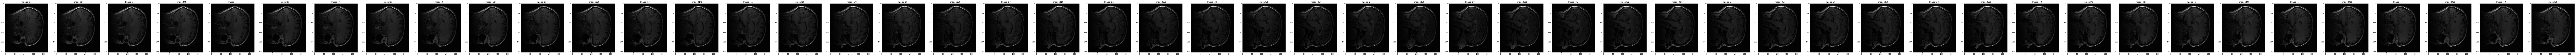

In [8]:
# show t1 scan
show_images(t1_scan[100:150])

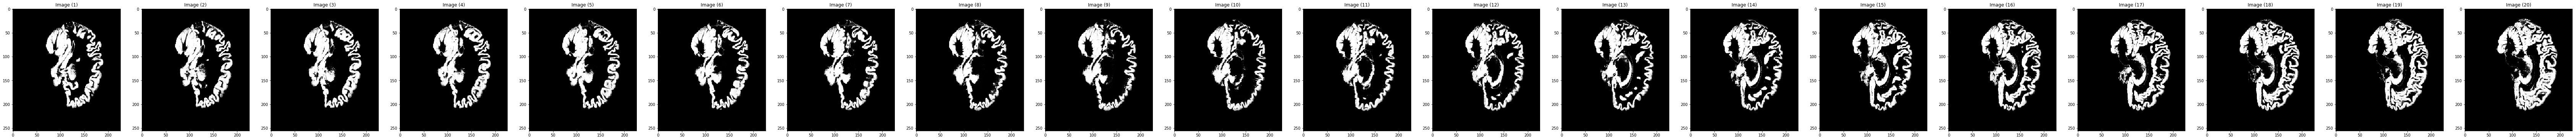

In [9]:
# Grey Matter
show_images(c1_scan[100:120])

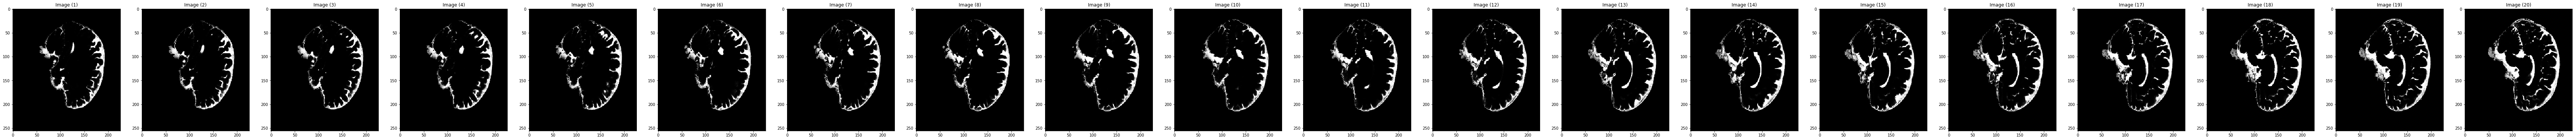

In [0]:
# CSF
show_images(c3_scan[100:120])

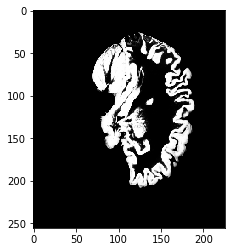

In [10]:
plt.imshow(c1_scan[100])

## Testing Patch Extraction

In [0]:
import tensorflow as tf

In [14]:
aScan = t1_scan[100]
c1Scan = c1_scan[100]
aScan.shape

(256, 226)

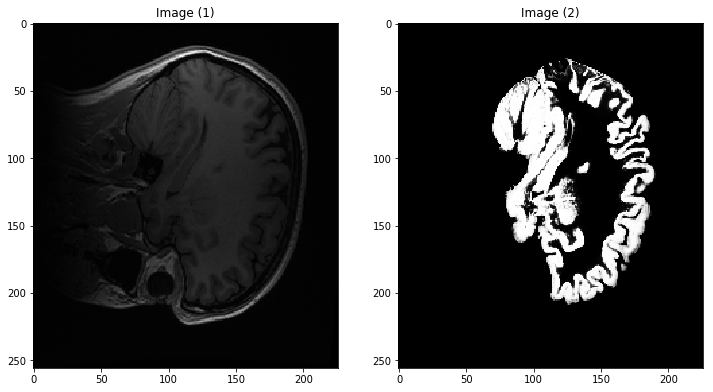

In [13]:
show_images([aScan, c1Scan])

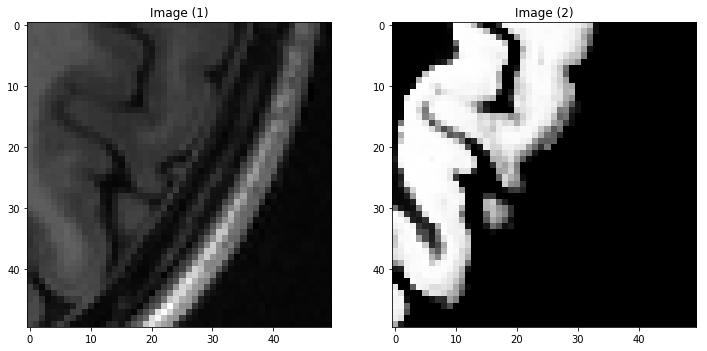

In [15]:
extractScan = aScan[150:200, 150:200]
extractC1 = c1Scan[150:200, 150:200]

show_images([extractScan, extractC1])

In [16]:
from sklearn.feature_extraction import image

# Gets Patches
t1_patches = image.extract_patches_2d(aScan, (23, 23))
c1_patches = image.extract_patches_2d(c1Scan, (23, 23))
t1_patches.shape
c1_patches.shape

(47736, 23, 23)

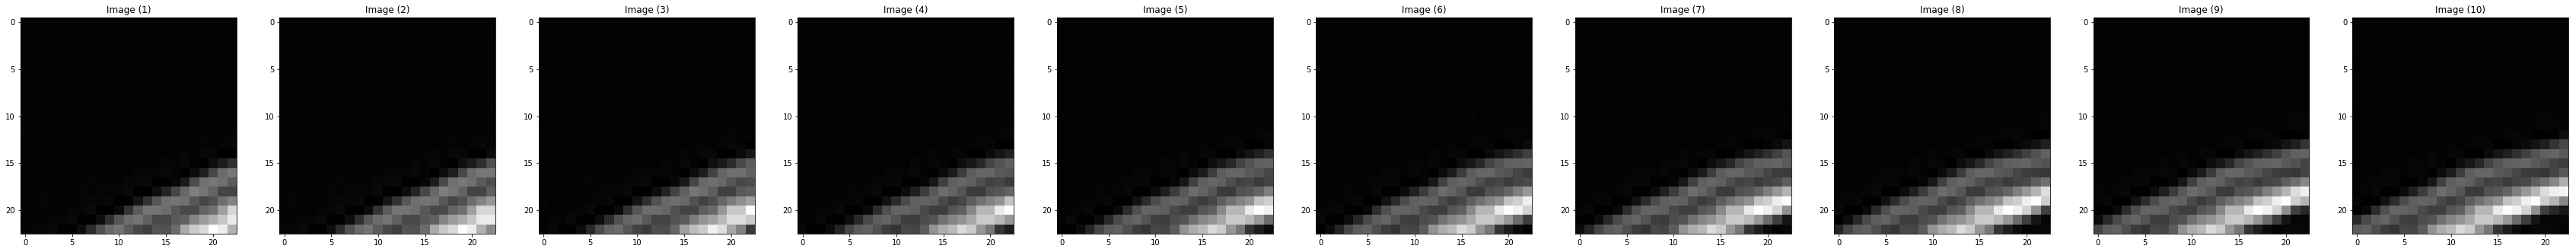

In [27]:
show_images(t1_patches[900:910])

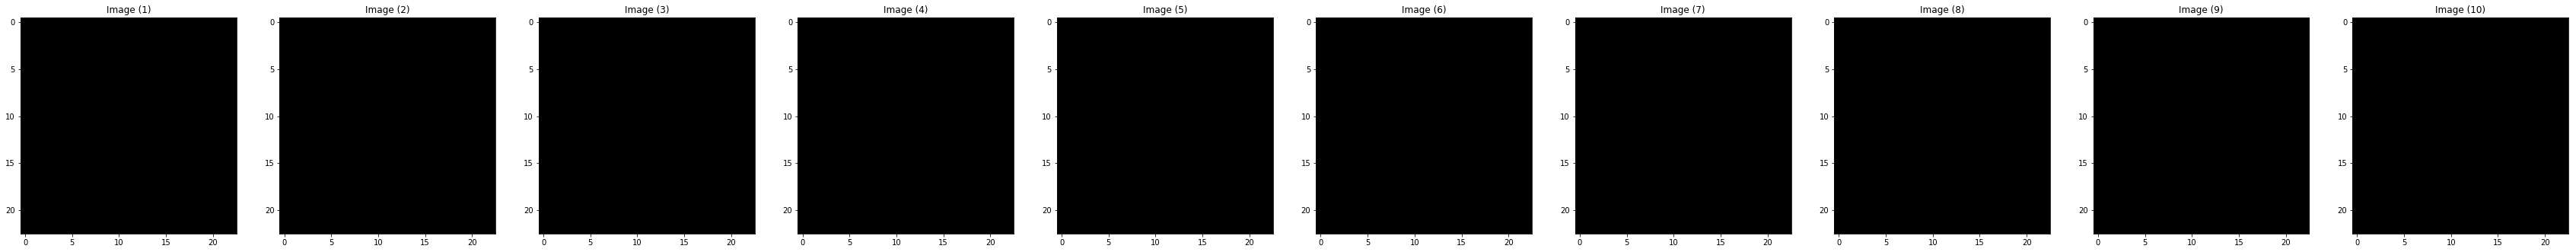

In [26]:
show_images(c1_patches[900:910])

In [0]:
labelsList = []
for index, patch in enumerate(c1_patches):
  if patch[12, 12] != 0:
    labelsList.append(1)
  else:
    labelsList.append(0)
labelsList = np.array(labelsList)  

In [92]:
# Returns Labels
print(labelsList[30000:31000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 

In [90]:
num = labelsList[1]
type(num)

numpy.int64

## Creating the Neural Network

In [61]:
print(t1_patches.shape)
print(type(t1_patches))

(47736, 23, 23)
<class 'numpy.ndarray'>


In [59]:
print(labelsList.shape)
print(type(labelsList))

(47736,)
<class 'numpy.ndarray'>


In [72]:
train_images = t1_patches.reshape((47736, 23, 23, 1)).astype('float32') / 255
train_images.shape

(47736, 23, 23, 1)

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [0]:
# Define the models architecture
def create_model():
    # Build the architecture
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', input_shape=(23, 23, 1), padding="same"))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding="same"))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1), metrics=['acc'])
  
    return model

In [78]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 23, 23, 64)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                204864    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total para

In [79]:
model.fit(train_images, labelsList, batch_size=64, epochs=10)

Epoch 1/10
47736/47736 [==============================] - 4s 75us/sample - loss: 3.9461 - acc: 0.7543
Epoch 2/10
47736/47736 [==============================] - 3s 70us/sample - loss: 3.9498 - acc: 0.7549
Epoch 3/10
47736/47736 [==============================] - 3s 69us/sample - loss: 3.9498 - acc: 0.7549
Epoch 4/10
47736/47736 [==============================] - 3s 69us/sample - loss: 3.9498 - acc: 0.7549
Epoch 5/10
47736/47736 [==============================] - 3s 69us/sample - loss: 3.9498 - acc: 0.7549
Epoch 6/10
47736/47736 [==============================] - 3s 68us/sample - loss: 3.9498 - acc: 0.7549
Epoch 7/10
47736/47736 [==============================] - 3s 69us/sample - loss: 3.9498 - acc: 0.7549
Epoch 8/10
47736/47736 [==============================] - 3s 69us/sample - loss: 3.9498 - acc: 0.7549
Epoch 9/10
47736/47736 [==============================] - 3s 69us/sample - loss: 3.9498 - acc: 0.7549
Epoch 10/10
47736/47736 [==============================] - 3s 69us/sample - loss: 

## Predict Batch and re-construct the image

In [0]:
this = model.predict_on_batch(train_images)

In [82]:
this.shape

(47736, 1)

In [0]:
done = np.reshape(this, (234, 204))

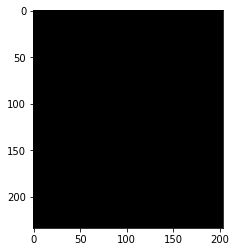

In [86]:
plt.imshow(done)